<a href="https://colab.research.google.com/github/ptsurko/AIML-notebooks/blob/master/Linear_Regression_House_sales_prediction_in_King_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Sales in King County, USA

https://www.kaggle.com/harlfoxem/housesalesprediction

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "pavelkey" # username from the json file
os.environ['KAGGLE_KEY'] = "2d38d31c6d5bdc84afc023ad38f79088" # key from the json file

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import zipfile

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!kaggle datasets download -d harlfoxem/housesalesprediction # api copied from kaggle

zipref = zipfile.ZipFile('/content/housesalesprediction.zip', 'r')
zipref.extractall()
zipref.close()

data = pd.read_csv('./kc_house_data.csv')

housesalesprediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
data_cleaned = data.drop(['id','date'], axis = 1)

# Single feature regression

In [0]:
feature = 'sqft_living'
X = data_cleaned[feature].values.reshape(-1, 1)
y = data_cleaned['price']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print('score(train): ', reg.score(X_train, y_train))
print('score(test) : ', reg.score(X_test, y_test))

print('Coef     : ', reg.coef_)
print('Intercept: ', reg.intercept_)

y_pred = reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared : ', metrics.r2_score(y_test, y_pred))

pd.DataFrame(np.stack((y_test, y_pred), axis=1), columns=['test', 'pred']).head()

score(train):  0.497184652146727
score(test) :  0.47446561582166136
Coef     :  [283.18310605]
Intercept:  -48592.53859591903
Mean Absolute Error: 176581.05018395314
Mean Squared Error: 68214975527.265236
Root Mean Squared Error: 261179.96769902785
R squared :  0.47446561582166136


,test,pred
0,480000.0,7.075064e+05
1,308550.0,4.045004e+05
2,427000.0,5.800740e+05
3,315000.0,4.894554e+05
4,925000.0,1.098299e+06


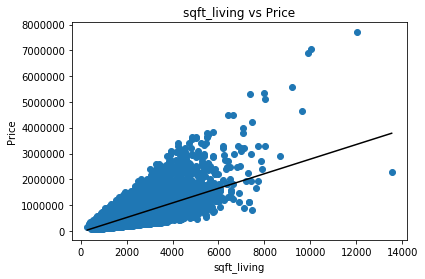

In [0]:
min_max = [[X.min()], [X.max()]]
plt.scatter(X, y)  
plt.plot(min_max, reg.predict(min_max),color='k')
plt.title(feature + ' vs Price')  
plt.xlabel(feature)  
plt.ylabel('Price')  
plt.show()

# Tensorflow NN

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [0]:
X = data_cleaned[feature].values.reshape(-1, 1).astype(float)
y = data_cleaned['price'].values.reshape(-1, 1).astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

# lr - depends on features. Ex bedrooms - 0.5, sqft_living - 0.00005
optimizer = tf.keras.optimizers.SGD(lr=0.00005, momentum=0.9)

model.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mae'])
model.summary()

history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_test, y_test))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 17290 samples, validate on 4323 samples
Epoch 1/50
17290/17290 [==============================] - 1s 60us/sample - loss: 173172.5998 - mae: 173172.5469 - val_loss: 163605.5588 - val_mae: 163605.5625
Epoch 2/50
17290/17290 [==============================] - 1s 47us/sample - loss: 169405.7756 - mae: 169405.7344 - val_loss: 163347.0475 - val_mae: 163347.0312
Epoch 3/50
17290/17290 [==============================] - 1s 50us/sample - loss: 169151.3920 - mae: 169151.4375 - val_loss: 163202.3684 - val_mae: 163202.3594
Epoch 4/50
17290/17290 [==============================] - 1s 46us/sample - loss: 169285.0732 - mae: 169285.0156 - val_loss: 164

weights:  [array([[245.1813]], dtype=float32), array([9.756279], dtype=float32)]


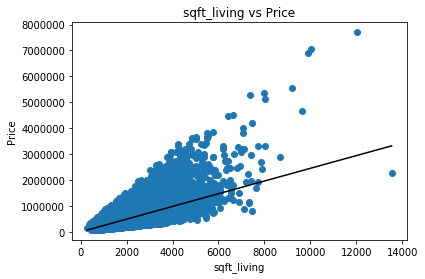

In [0]:
print('weights: ', model.get_weights())
bedrooms = [[X.min()],
            [X.max()]]
plt.scatter(X, y)  
plt.plot(bedrooms, model.predict(bedrooms),color='k')
plt.title(feature + ' vs Price')  
plt.xlabel(feature)  
plt.ylabel('Price')  
plt.show()

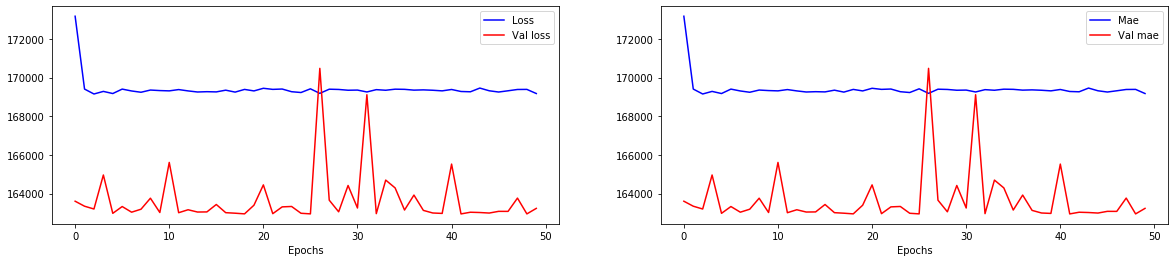

In [0]:
epochs=len(history.history['loss'])

plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history.history['loss'], 'b', label='Loss')
plt.plot(range(epochs), history.history['val_loss'], 'r', label='Val loss')
plt.xlabel("Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history.history['mae'], 'b', label='Mae')
plt.plot(range(epochs), history.history['val_mae'], 'r', label='Val mae')
plt.xlabel("Epochs")
plt.legend()

plt.show()

In [0]:
y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared : ', metrics.r2_score(y_test, y_pred))

pd.DataFrame(np.stack((y_test.ravel(), y_pred.ravel()), axis=1), columns=['test', 'pred']).head()

Mean Absolute Error: 163234.91687810837
Mean Squared Error: 61674519576.73968
Root Mean Squared Error: 248343.55151028116
R squared :  0.4786823381440243


,test,pred
0,665000.0,593348.50000
1,380000.0,451143.34375
2,551500.0,723294.62500
3,645000.0,556571.31250
4,340000.0,512438.68750


# Multifeature regression

In [0]:
X = data_cleaned.iloc[:,1:]
y = data_cleaned['price'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
with sns.plotting_context("notebook"):
    sns.pairplot(data[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20', height=3)

In [0]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('score(train): ', reg.score(X_train, y_train))
print('score(test) : ', reg.score(X_test, y_test))

print('Coef     : ', reg.coef_)
print('Intercept: ', reg.intercept_)

y_pred = reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared : ', metrics.r2_score(y_test, y_pred))

pd.DataFrame(np.stack((y_test, y_pred), axis=1), columns=['test', 'pred']).head()

score(train):  0.6972921803178034
score(test) :  0.707562947558846
Coef     :  [-3.43780273e+04  3.72818160e+04  1.13248941e+02  1.54795559e-01
  5.80939543e+03  5.16620080e+05  5.74441874e+04  2.58834273e+04
  9.72841882e+04  7.21728230e+01  4.10761182e+01 -2.55915399e+03
  2.29666266e+01 -5.91518729e+02  5.99816169e+05 -2.19722522e+05
  1.57499714e+01 -3.94585461e-01]
Intercept:  6989419.35870584
Mean Absolute Error: 128618.16055328742
Mean Squared Error: 41107997024.59818
Root Mean Squared Error: 202751.07157447573
R squared :  0.707562947558846


,test,pred
0,450000.0,429781.291959
1,509000.0,593405.757758
2,552000.0,491539.538984
3,152500.0,-900.169536
4,209950.0,131697.734497
